In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train['Sex'].value_counts()
#access to a certain column of the file by name as string

,count
Sex,
male,577
female,314


In [5]:
#access to a row of file
train.iloc[1]

,1
PassengerId,2
Survived,1
Pclass,1
Name,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,female
Age,38.0
SibSp,1
Parch,0
Ticket,PC 17599
Fare,71.2833


Text(0.5, 1.0, 'Age vs Fare')

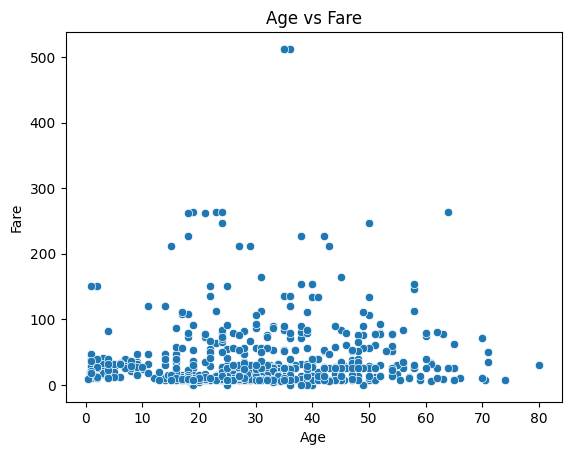

In [6]:
#plot a scatterplot of 'Age' vs 'Income' columns
sns.scatterplot(data=train, x='Age', y='Fare')
plt.title('Age vs Fare')

<Axes: >

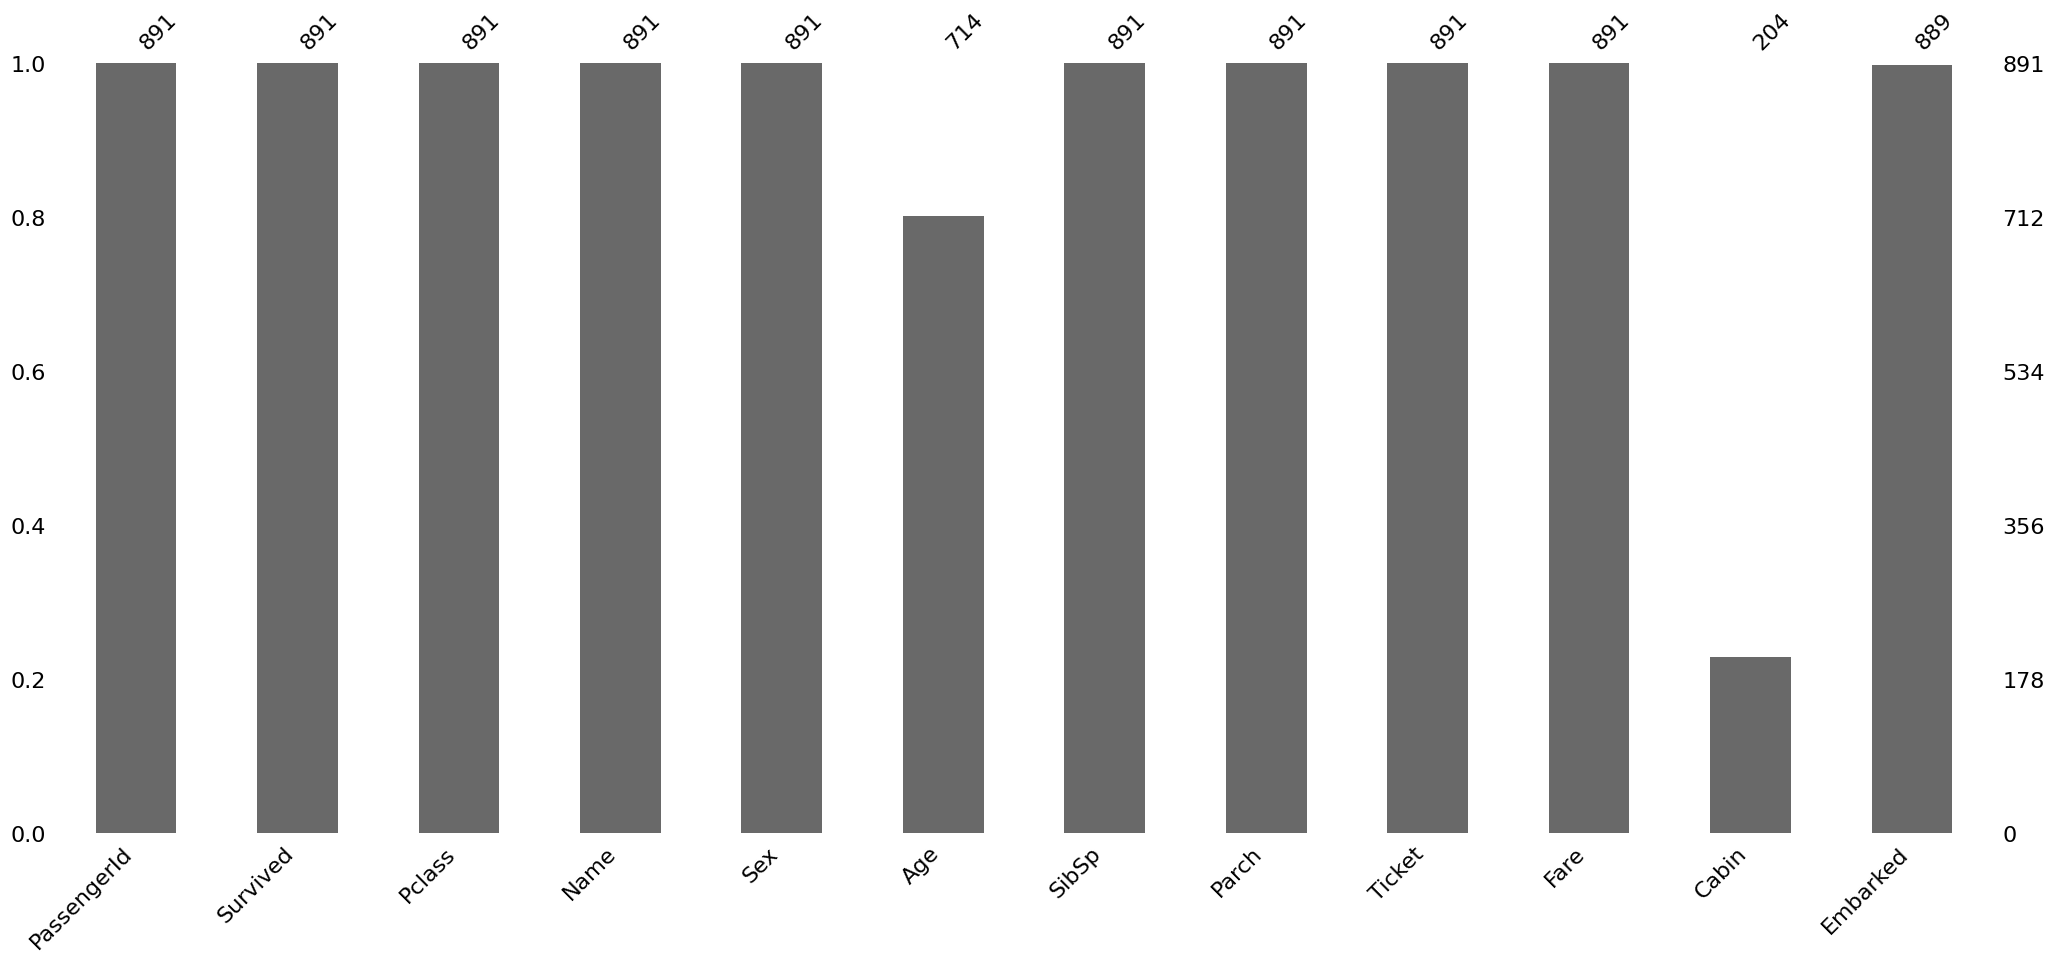

In [11]:
import missingno as msno
msno.bar(train)

<Axes: >

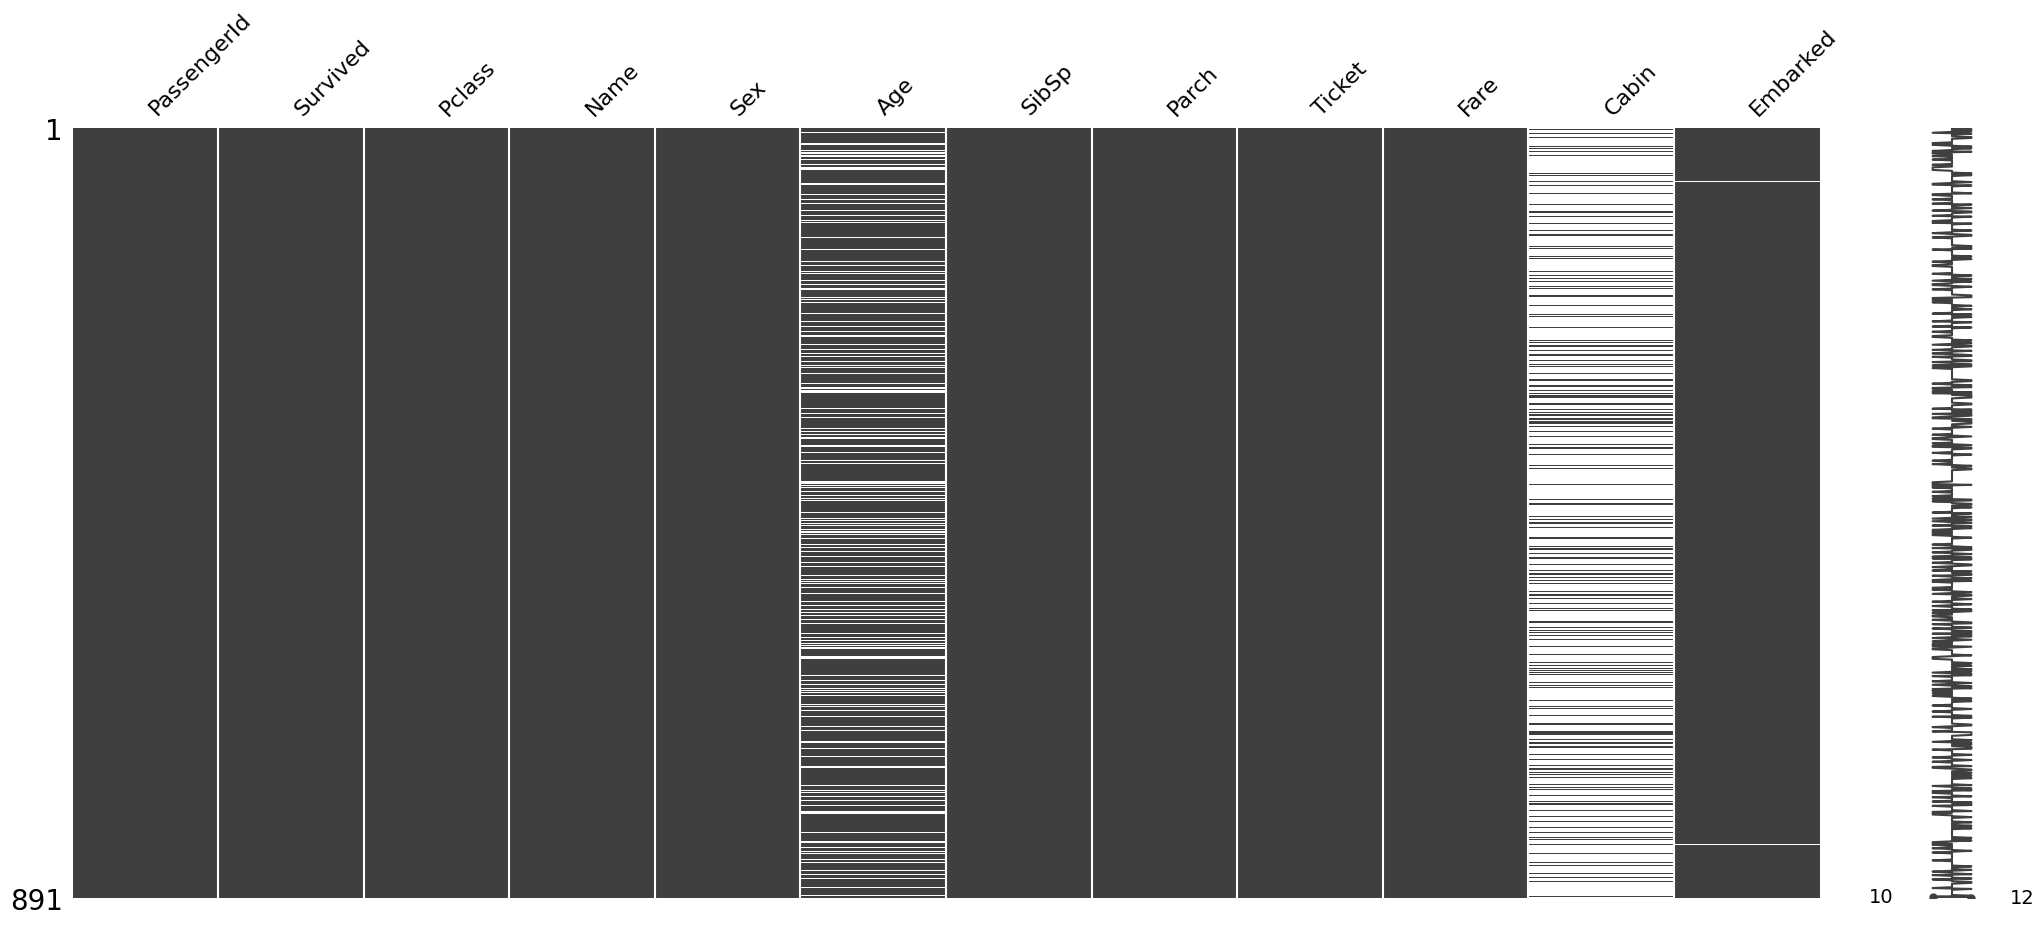

In [9]:
import missingno as msno
msno.matrix(train)

<Axes: >

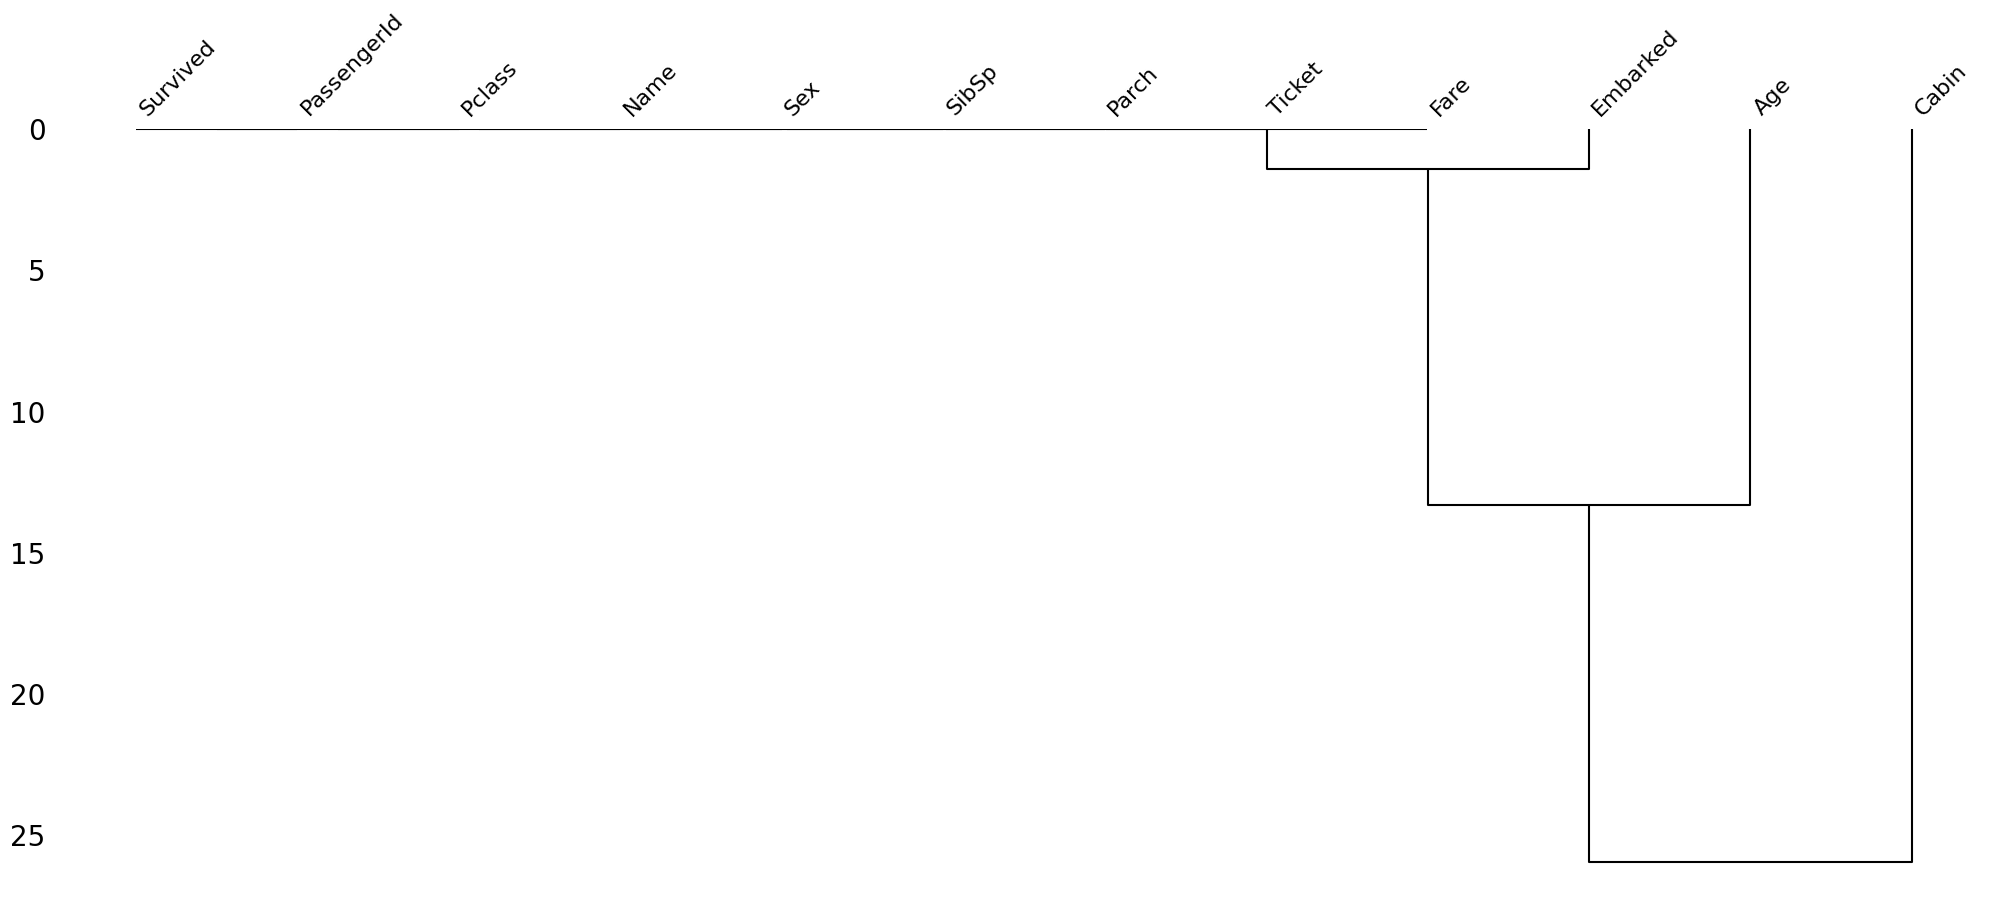

In [10]:
msno.dendrogram(train)

In [12]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
train_1 = train.copy()
train_1['Age'].mean()

29.69911764705882

In [15]:
train_1.dropna(subset=['Age'], inplace=True, how='any')
train_1['Age'].isnull().sum()

0

In [17]:
train_1.dropna(subset=['Cabin'], inplace=True, how='any')
train_1['Cabin'].isnull().sum()

0

<Axes: >

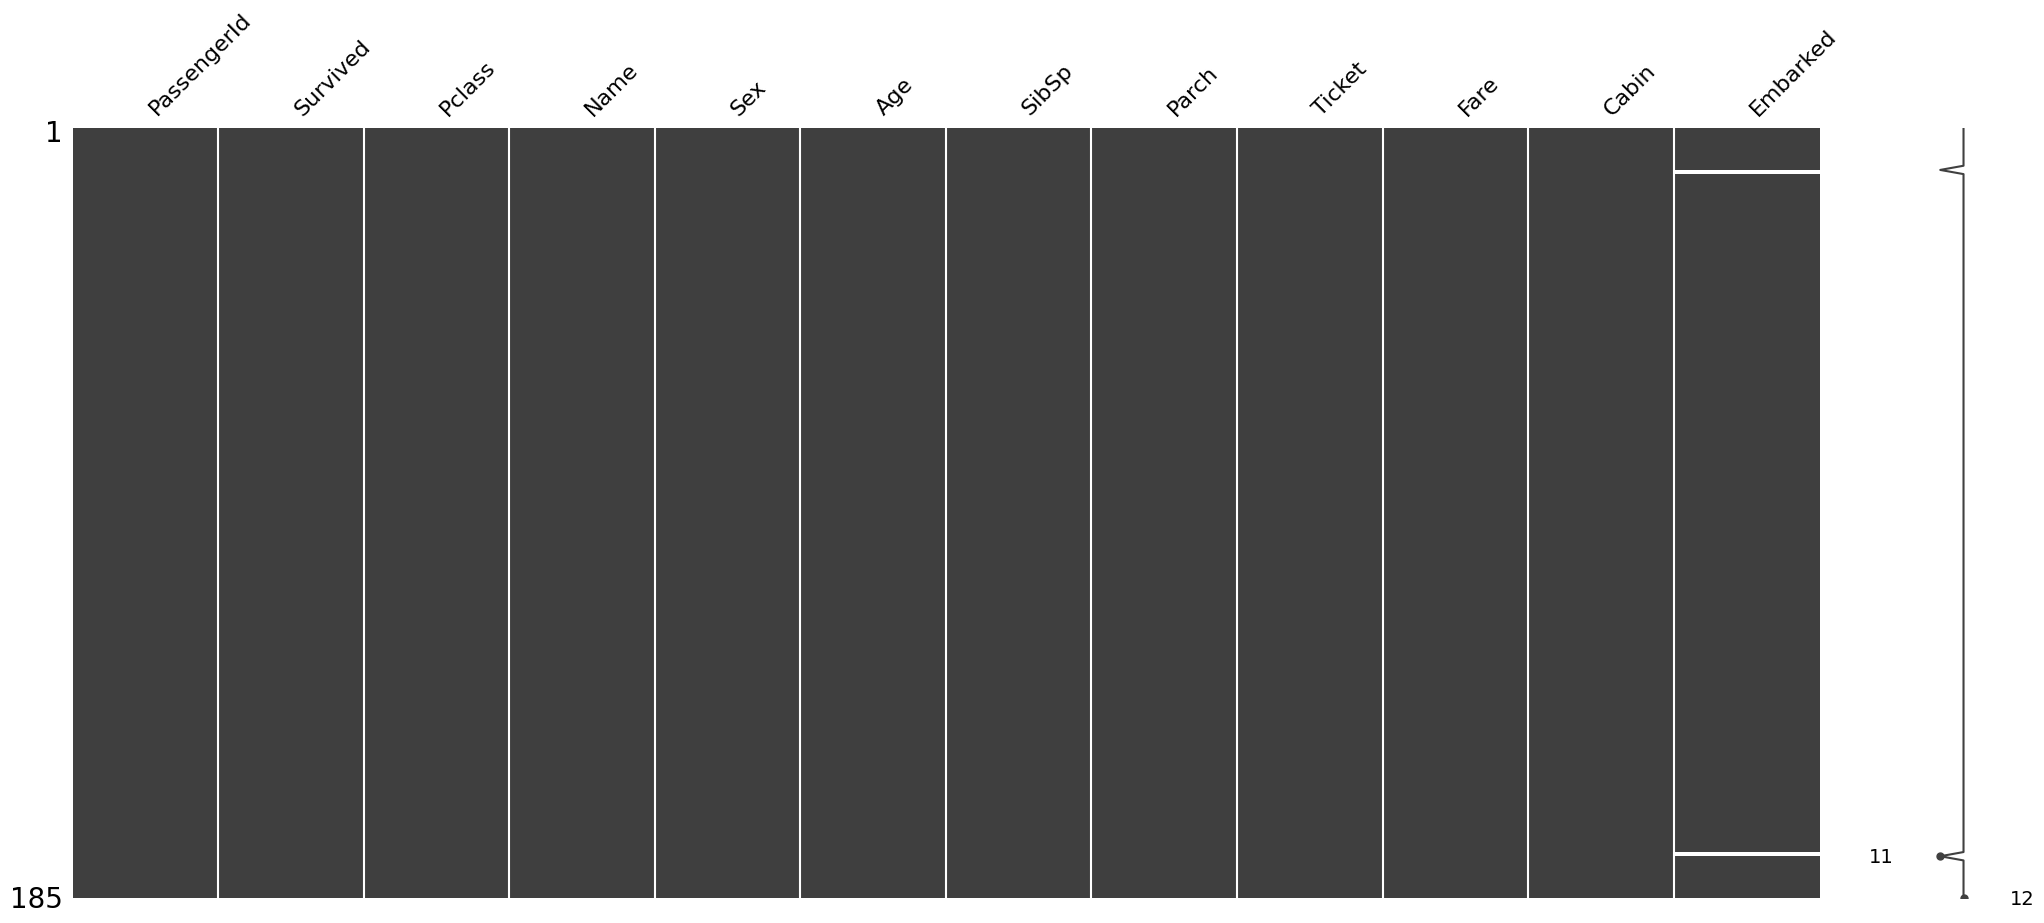

In [22]:
msno.matrix(train_1)

In [23]:
 from sklearn.impute import SimpleImputer
 train_constant = train.copy()
 mean_imputer = SimpleImputer(strategy='constant', fill_value=0)
 train_constant.iloc[:,:] = mean_imputer.fit_transform(train_constant)
 train_constant.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


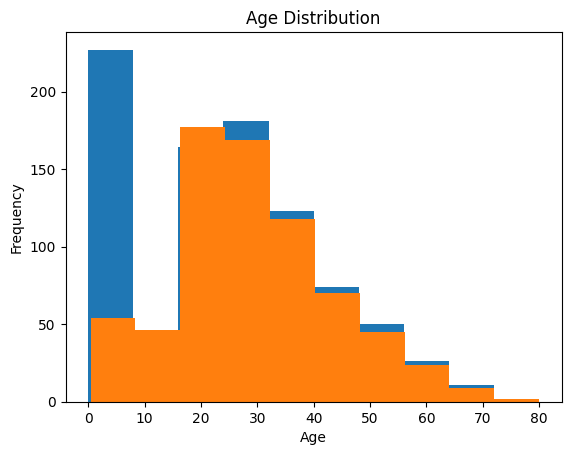

In [24]:
train_constant['Age'].plot.hist()
train['Age'].plot.hist()
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer
train_most_frequent = train.copy()
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
train_most_frequent.iloc[:,:] = most_frequent_imputer.fit_transform(train_most_frequent)
train_most_frequent

In [28]:
city_day = pd.read_csv('city_day.csv', index_col='Date')
city_day1 = city_day.copy(deep=True)
city_day1.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [29]:
city_day.fillna(method='bfill', inplace=True)
city_day['Xylene'][50:65]

<ipython-input-29-1bbaa859763a>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  city_day.fillna(method='bfill', inplace=True)


,Xylene
Date,
2015-02-20,7.48
2015-02-21,15.44
2015-02-22,8.47
2015-02-23,28.46
2015-02-24,6.05
2015-02-25,0.81
2015-02-26,1.32
2015-02-27,1.32
2015-02-28,1.32
